# Coursework 2: Understanding Data #

## Brief ##

You can download the a Zip file containing the HTML pages with the OCR results here. Inside the zip file, their are 24 folders representing the 24 texts, with each page represented by the sequentially numbered HTML files. We haven’t included the original scanned images due to their size (around 4GB), however, you can browse the original scans here if you wish.

__The aim of this coursework is for you to explore how these 24 texts are related by applying appropriate data mining techniques.__ 

You’ll need to create software to extract the contents of the HTML files and build some form of feature representation to which you can apply standard descriptive data mining techniques. At a minimum, we’re expecting you to experiment with `Hierarchical Clustering` and `Multi-Dimensional Scaling`, however you might also explore other approaches.

## Text analysis processes ##
- Dimensionality reduction   
: pre-processing data, identify root word for actual words and reduce the size of the text data
- Information retrieval or identification of a corpus   
: preparatory step, collecting or identifying a set of textual materials
- natural language processing
- Named entity recognition   
: use of gazetteers or statistical techniques to identify named text features
- Disambiguation    
: use of contextual clues, required to decide where(e.g. 'Ford' can refer to a former US president, or some other entity
- Recognition of pattern identified entities   
: features can be discerned via regular expression or other pattern matches
- Document clustering   
: identification of sets of similar text documents
- Conreference   
: identification of noun phrases and other terms that refer to the same objects
- Sentiment analysis
- Quantitative text analysis

### 1. merge all files in each folder with cleansing useless charactor
- 

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
import urllib
from bs4 import BeautifulSoup

In [6]:
def scrap_html():
    walk_dir = "./gap-html/"
    books = pd.DataFrame(columns=['book_name', 'contents']) # pandas 활용해서 data 저장.
    
    print('walk_dir = ' + walk_dir)
    print('walk_dir (absolute) = ' + os.path.abspath(walk_dir))
    
    book_id = 0
    for root, subdirs, files in os.walk(walk_dir):
        if book_id == 0:
            book_id+=1
            continue
        path, book_name = os.path.split(root)
        all_text = ""
        for filename in files:
            #Get file path
            file_path = os.path.join(root, filename)
            #Read file
            soup = BeautifulSoup(open(file_path,'r',encoding='utf-8'), "html.parser")
            ocr_tags = soup.select(".ocr_cinfo")
            #Extract text
            text_list = [tag.get_text() for tag in ocr_tags]
            text = ' '.join(text_list)
            if text.strip() != '':
                #concat text in each page and add to dataframe
                all_text = all_text + text + ' '
        books.loc[book_id] = [book_name, all_text]
        print('Save book: ' + book_name)
        book_id += 1
    return books

In [7]:
books = scrap_html()

walk_dir = ./gap-html/
walk_dir (absolute) = C:\Users\taebe\Desktop\python_projects\dm-understanding-data\gap-html
Save book: gap_-C0BAAAAQAAJ
Save book: gap_2X5KAAAAYAAJ
Save book: gap_9ksIAAAAQAAJ
Save book: gap_aLcWAAAAQAAJ
Save book: gap_Bdw_AAAAYAAJ
Save book: gap_CnnUAAAAMAAJ
Save book: gap_CSEUAAAAYAAJ
Save book: gap_DhULAAAAYAAJ
Save book: gap_dIkBAAAAQAAJ
Save book: gap_DqQNAAAAYAAJ
Save book: gap_fnAMAAAAYAAJ
Save book: gap_GIt0HMhqjRgC
Save book: gap_IlUMAQAAMAAJ
Save book: gap_MEoWAAAAYAAJ
Save book: gap_m_6B1DkImIoC
Save book: gap_ogsNAAAAIAAJ
Save book: gap_pX5KAAAAYAAJ
Save book: gap_RqMNAAAAYAAJ
Save book: gap_TgpMAAAAYAAJ
Save book: gap_udEIAAAAQAAJ
Save book: gap_VPENAAAAQAAJ
Save book: gap_WORMAAAAYAAJ
Save book: gap_XmqHlMECi6kC
Save book: gap_y-AvAAAAYAAJ


In [36]:
print(books)

24


---

In [9]:
titles = ["Titus Livius' Roman History",
          "The History of the Peloponnesian War vol. II",
          "The History of the Peleponnesian War vol. I",
          "The History of the Decline and Fall of the Roman Empire vol. VI",
          "The History of the Decline and Fall of the Roman Empire vol. IV",
          "The History of the Decline and Fall of the Roman Empire vol. II",
          "The Works of Corenlius Tacitus vol. IV",
          "The Genuine Works of Flavius Josephus",
          "The Works of Josephus vol. IV",
          "The History of the Decline and Fall of the Roman Empire vol. I",
          "The History of Rome vol. I",
          "The Works of Cornelius Tacitus vol. V",
          "Dictionary of Greek and Roman Geography vol. II",
          "The History of Rome vol. III",
          "The Histories of Caius Cornelius Tacitus",
          "The Historical Annals of Cornelius Tacitus",
          "Pliny's Natural History",
          "Livy vol. III",
          "The Description of Greece",
          "The Works of Flavius Josephus vol. III",
          "The History of the Decline and Fall of the Roman Empire vol. III",
          "The History of the Decline and Fall of the Roman Empire vol. V",
          "The Whole Genuine Works of Flavius Josephus vol. II",
          "Livy vol. V"
         ]

author = ["William Gordon",
          "William Smith",
          "William Smith",
          "Edward Gibbon",
          "Thomas Bowdler",
          "Thomas Bowdler",
          "Arthur Murphy",
          "Flavius Josephus",
          "William Whiston",
          "Edward Gibbon",
          "Titus Livius",
          "Arthur Murphy",
          "William Smith",
          "Theodor Mommsen",
          "Caius Cornelius Tacitus",
          "Arthur Murphy",
          "John Bostock",
          "George Baker",
          "Paus Anias",
          "Titus Flavius Josephus",
          "Edward Gibbon",
          "Edward Gibbon",
          "William Whiston",
          "George Baker"
         ]

In [10]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [12]:
# load nltk's SnowballStemmer as variabled 'stemmer'
# It's the process of breaking a word down into its root
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

# Define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
     # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taebe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

---

In [14]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in range(1, len(books['contents'])):
    allwords_stemmed = tokenize_and_stem(books['contents'].loc[i])
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(books['contents'].loc[i])
    totalvocab_tokenized.extend(allwords_tokenized)

In [15]:
vocab_frame = pd.DataFrame({'words' : totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 5634204 items in vocab_frame


In [39]:
vocab_frame.head()
print(vocab_frame)

                 words
800020427l  800020427L
zoi5              ZOI5
dictionari  DICTIONARY
greek            GREEK
and                AND
...                ...
's                  's
squar           Square
biblioteca  Biblioteca
de                  de
catalunya    Catalunya

[5634204 rows x 1 columns]


---

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, max_features=300000,
                                  min_df=0.1, stop_words='english',
                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

# fit the vectorizer to synopses
%time tfidf_matrix = tfidf_vectorizer.fit_transform(books['contents'])

print(tfidf_matrix.shape)

C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 2min 17s
(24, 172658)


In [19]:
terms = tfidf_vectorizer.get_feature_names()

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

---

In [20]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print(clusters)

from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

Wall time: 12.6 s
[2, 3, 4, 0, 2, 1, 0, 4, 3, 3, 4, 0, 0, 3, 3, 1, 3, 3, 1, 2, 0, 2, 0, 1]


C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [21]:
import numpy as np

print(clusters)

book_array = {'book_name': books['book_name'], 'clusters': clusters, 'contents': books['contents']}

book_frame = pd.DataFrame(book_array, columns=['book_name', 'clusters'])

book_frame['book_name'].update(books['book_name'])

book_frame.index = [clusters]

print(book_frame)

book_frame['clusters'].value_counts() #number of films per cluster (clusters from 0 to 4)

[2, 3, 4, 0, 2, 1, 0, 4, 3, 3, 4, 0, 0, 3, 3, 1, 3, 3, 1, 2, 0, 2, 0, 1]
          book_name  clusters
2  gap_-C0BAAAAQAAJ         2
3  gap_2X5KAAAAYAAJ         3
4  gap_9ksIAAAAQAAJ         4
0  gap_aLcWAAAAQAAJ         0
2  gap_Bdw_AAAAYAAJ         2
1  gap_CnnUAAAAMAAJ         1
0  gap_CSEUAAAAYAAJ         0
4  gap_DhULAAAAYAAJ         4
3  gap_dIkBAAAAQAAJ         3
3  gap_DqQNAAAAYAAJ         3
4  gap_fnAMAAAAYAAJ         4
0  gap_GIt0HMhqjRgC         0
0  gap_IlUMAQAAMAAJ         0
3  gap_MEoWAAAAYAAJ         3
3  gap_m_6B1DkImIoC         3
1  gap_ogsNAAAAIAAJ         1
3  gap_pX5KAAAAYAAJ         3
3  gap_RqMNAAAAYAAJ         3
1  gap_TgpMAAAAYAAJ         1
2  gap_udEIAAAAQAAJ         2
0  gap_VPENAAAAQAAJ         0
2  gap_WORMAAAAYAAJ         2
0  gap_XmqHlMECi6kC         0
1  gap_y-AvAAAAYAAJ         1


3    7
0    6
2    4
1    4
4    3
Name: clusters, dtype: int64

---

In [22]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

print(num_clusters)

for i in range(num_clusters):
    print(i)
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    
    print("Cluster %d titles:" % i, end='')
    for title in book_frame.ix[i]['book_name'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

5
0
Cluster 0 words:

AttributeError: 'DataFrame' object has no attribute 'ix'

---

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=5)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


In [40]:
print(xs)
print(ys)

[ 0.03400696  0.58175173 -0.56818186  0.19236897  0.36877348 -0.56714274
 -0.05797507 -0.56424279  0.58501095  0.19303185 -0.65473335  0.08016703
  0.26456484  0.57306141 -0.21233158 -0.42681161  0.53863015  0.1140456
 -0.58799454  0.74759354  0.027514   -0.00772231 -0.18295371 -0.47043094]
[-0.04086925 -0.36815741  0.46524331  0.28995438 -0.61498993 -0.34126439
  0.52698483  0.29933289  0.38863558 -0.51487525  0.15991849  0.6326126
  0.5352925   0.11587544 -0.62082256 -0.16296181 -0.17230505 -0.38290823
 -0.2261466   0.00427679  0.6549744  -0.73621577  0.46776729 -0.35935228]


In [24]:
# #set up colors per clusters using a dict
# cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#800000', 5: '#008000', 6: '#00FFFF'}

# # #set up cluster names using a dict
# # cluster_names = {0: 'PELOPONNESIAN, Sulla, fays', 
# #                  1: 'Justinian, Christians, Constantinopole', 
# #                  2: 'Germanicus, Samnites, Lucius',
# #                  3: 'Herod, Josephus, Hyrcanus'}

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
# cluster_names = {0: 'Christian, Constantinople, Justinian', 
#                  1: 'Herod, Jerusalem, Judea', 
#                  2: 'Sulla, Lucius, Hannibal', 
#                  3: 'Germanicus, Galba, Otho', 
#                  4: 'PELOPONNESIAN, Lacedaemonians, fays'}

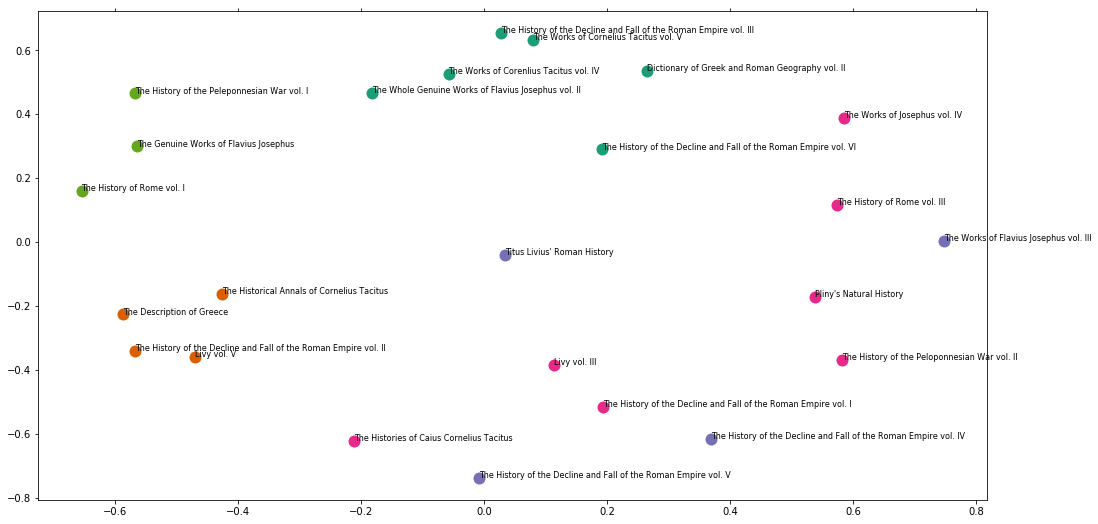

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=120)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts 
#with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
# ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title

for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)
 
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

---

t-SNE done! Time elapsed: {} seconds0.08178114891052246
[[  9.738073    -1.4274592 ]
 [  7.128873     1.4538612 ]
 [  6.7681813   -0.9921026 ]
 [  0.6450222    3.6163487 ]
 [  1.5675267    1.9836087 ]
 [ -7.975478    -0.49127173]
 [  3.0507221    0.03254151]
 [ 13.040021     4.0128956 ]
 [  7.2679543   -1.5870348 ]
 [  0.15035975 -12.894346  ]
 [  2.142243    -3.7463193 ]
 [  3.9829748   -3.657679  ]
 [  0.10720372   5.078258  ]
 [  3.575327    -2.7515917 ]
 [ -7.243468     2.1776664 ]
 [  0.5131588   -2.1268315 ]
 [ 11.087248     2.622273  ]
 [  1.9366484   -1.0899996 ]
 [ -5.345202     2.5492477 ]
 [  4.88275     -3.0758872 ]
 [  5.1073017    0.59721375]
 [ -4.0909705   -0.98607475]
 [-23.326826    26.32718   ]
 [  8.704202    -1.55931   ]]


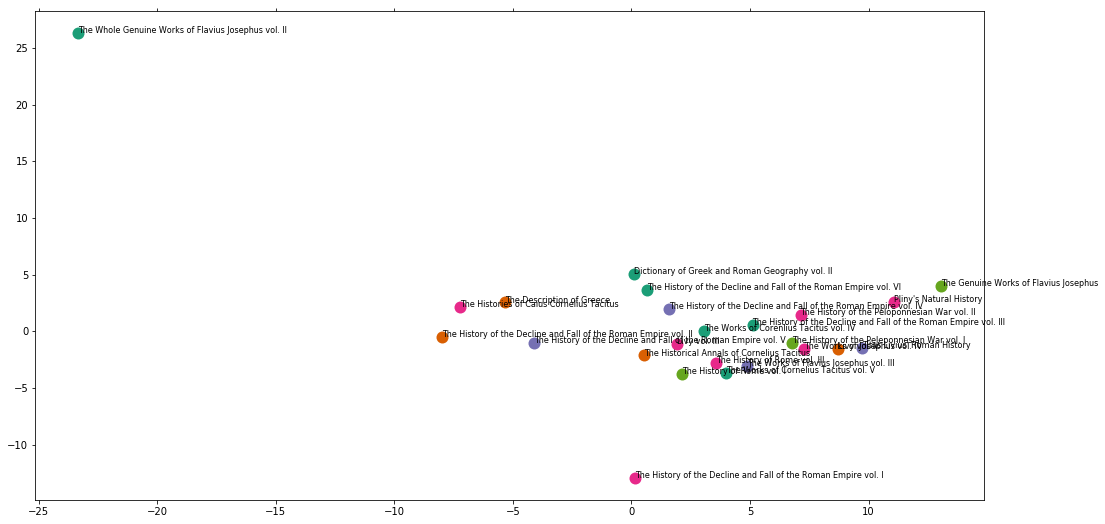

In [26]:
import time
# from ggplot import *

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, 
            perplexity=50.0, 
            early_exaggeration=12.0, 
            learning_rate=100.0, 
            n_iter=250, 
            n_iter_without_progress=600, 
            min_grad_norm=0.000001,  
            init='random', 
            metric='euclidean',
            verbose=0, 
            random_state=None, 
            method='barnes_hut', 
            angle=0.5)

tsne_results = tsne.fit_transform(dist)

print ('t-SNE done! Time elapsed: {} seconds' + format(time.time()-time_start))

print(tsne_results)

# df_tsne = dist
# df_tsne['x-tsne'] = tsne_results[:,0]
# df_tsne['y-tsne'] = tsne_results[:,1]

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=tsne_results[:, 0], y=tsne_results[:, 1], label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
# ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title

for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)
 
plt.show() #show the plot

# chart = ggplot(dist) \
#         + geom_point(size=70,alpha=0.1) \
#         + ggtitle("tSNE dimensions colored by digit")
# chart

---

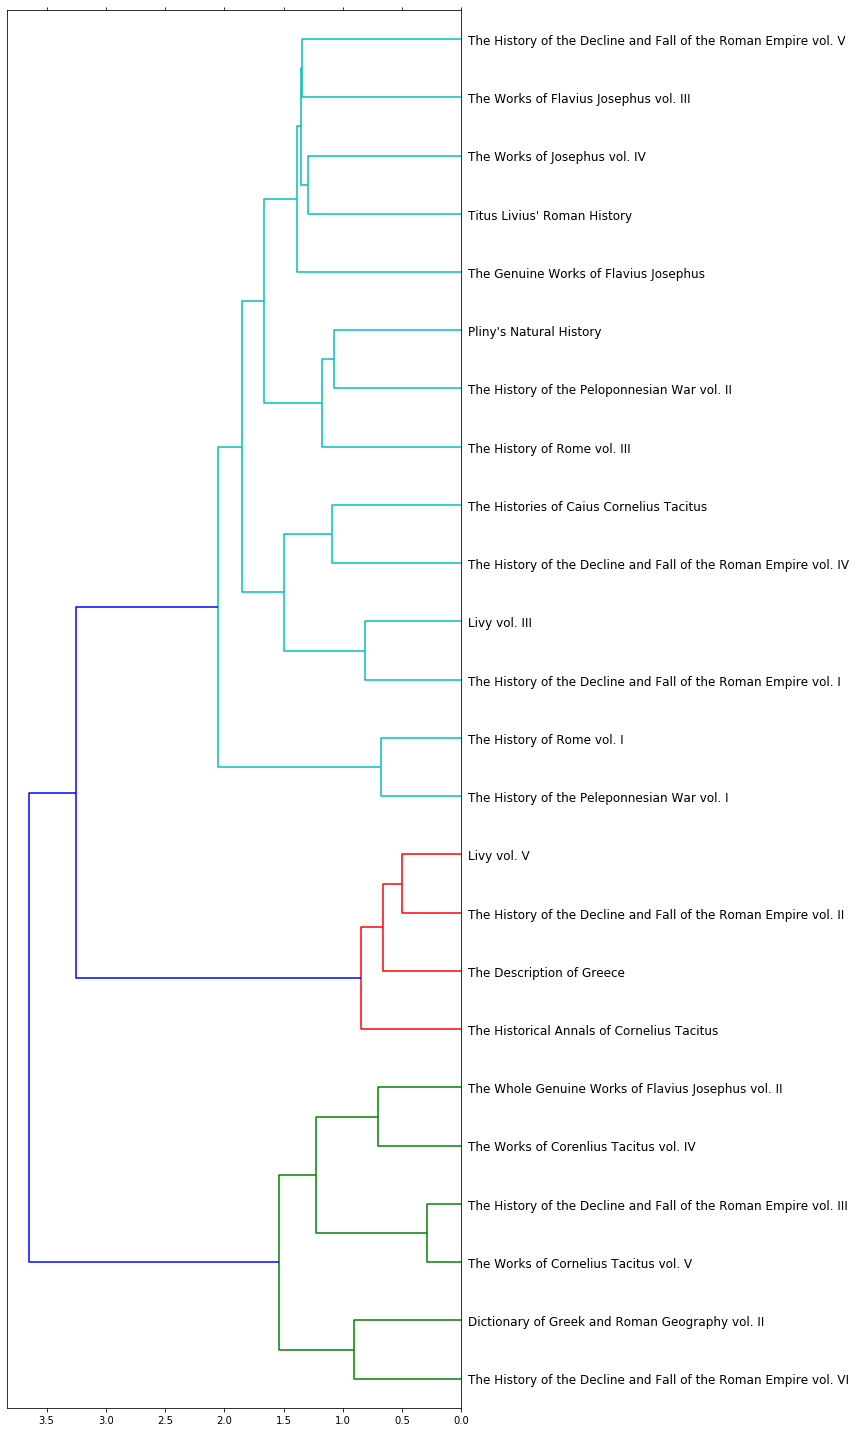

In [27]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(12, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="left", labels=titles, leaf_font_size=12);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters